# Análise exploratória dos dados (EDA)

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015. 

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de variáveis:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não foi ao médico por questões financeiras, 1 = foi ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual (dólares) em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

In [1]:
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency, kstest, norm

#funções desenvolvidas para o projeto
from src.estatistica import (
    analise_levene, 
    analise_ttest_ind, 
    analise_mannwhitneyu,
    histogramas_variaveis_categoricas, 
    histogramas_variaveis_categoricas_nao_binarias,
    remove_outliers
)
from src.config import DADOS_TRATADOS 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(style='dark', palette='dark', context='paper')

df_diabetes_tratado = pd.read_parquet(DADOS_TRATADOS)

df_diabetes_tratado.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5,30,Não,Feminino,35-39,Faculdade +,75.000+
1,Não,Sim,Sim,Sim,26,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0,0,Não,Feminino,75-79,Faculdade +,75.000+
2,Não,Não,Não,Sim,26,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0,10,Não,Feminino,80+,Faculdade +,75.000+
3,Não,Sim,Sim,Sim,28,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0,3,Não,Feminino,70-74,Faculdade +,75.000+
4,Não,Não,Não,Sim,29,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito boa,0,0,Não,Masculino,55-59,Fac. inc ou Tec,75.000+


In [3]:
df_diabetes_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  int8    
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

Para facilitar o manejo e análise das informações estou agrupando as colunas de acordo com suas características

In [4]:
colunas_numericas = df_diabetes_tratado.select_dtypes(include="number").columns.tolist()

coluna_alvo = "Diabetes"

colunas_categoricas = df_diabetes_tratado.select_dtypes(include="category").columns.tolist()
colunas_categoricas.remove(coluna_alvo)

colunas_binarias = df_diabetes_tratado.nunique()[df_diabetes_tratado.nunique() == 2].index.tolist()
colunas_binarias.remove(coluna_alvo)

colunas_nao_binarias = list(set(colunas_categoricas) - set(colunas_binarias))

In [5]:
colunas_numericas

['IMC', 'DiasProblemasMentais', 'DiasProblemasFisicos']

In [6]:
coluna_alvo

'Diabetes'

In [7]:
colunas_categoricas

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'SaudeGeral',
 'DificuldadeAndar',
 'Genero',
 'FaixaIdade',
 'Ensino',
 'FaixaRenda']

In [8]:
colunas_binarias

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'DificuldadeAndar',
 'Genero']

In [9]:
len(colunas_binarias)

14

In [10]:
colunas_nao_binarias

['FaixaIdade', 'FaixaRenda', 'Ensino', 'SaudeGeral']

# Tratamento dos outliers

In [11]:
df_diabetes_sem_outliers = df_diabetes_tratado.copy()
df_diabetes_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  int8    
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

In [12]:
#tirar outliers
for coluna in colunas_numericas:
    df_diabetes_sem_outliers[coluna] = remove_outliers(df_diabetes_sem_outliers[coluna])

df_diabetes_sem_outliers.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,68511.000000,58876.000000,60068.000000
mean,29.129673,0.526615,1.880619
std,5.695466,1.271375,3.727202
min,13.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,33.000000,0.000000,2.000000
max,45.000000,5.000000,15.000000


## Variáveis numéricas

Análise estatística das variáveis numéricas


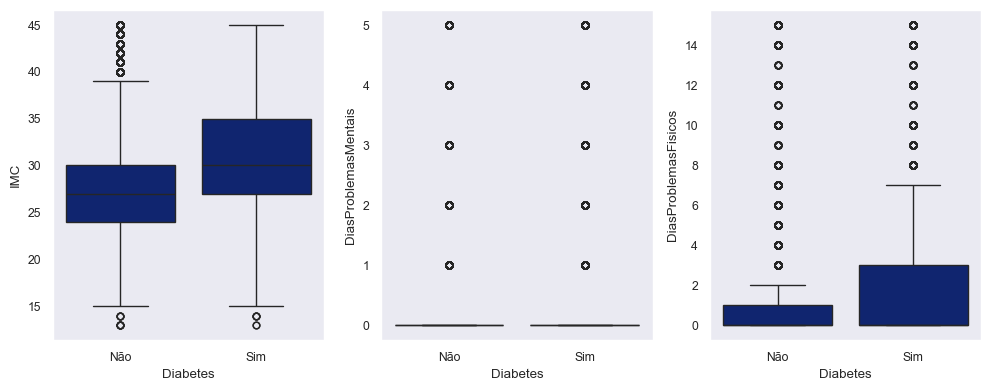

In [13]:
fig, axs = plt.subplots(1,3, figsize =(10,4))
for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data= df_diabetes_sem_outliers, x=coluna_alvo, y=coluna, ax=ax)
    
plt.tight_layout()
plt.show()

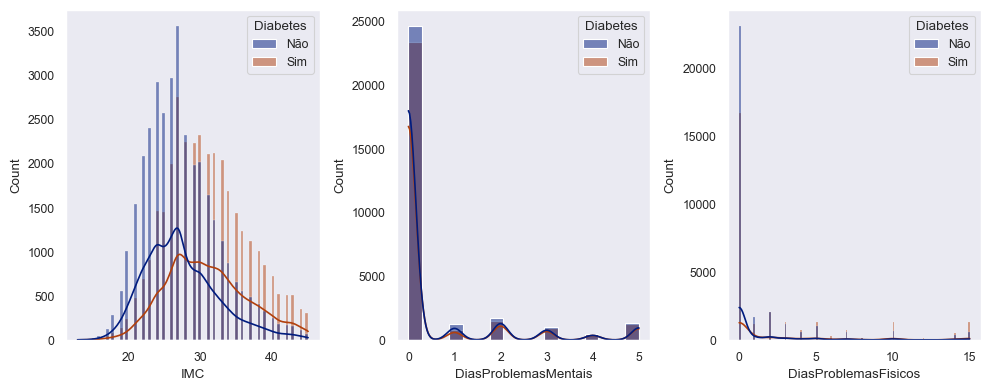

In [14]:
fig, axs = plt.subplots(1,3, figsize =(10,4))
for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data= df_diabetes_sem_outliers, x=coluna, hue=coluna_alvo, kde=True,ax=ax)
    
plt.tight_layout()
plt.show()

Abaixo uma opção para avaliar se há diferença relevante no imc.

In [15]:
df_diabetes_sem_outliers.groupby(coluna_alvo).describe()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16244\2736083915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diabetes_sem_outliers.groupby(coluna_alvo).describe()


IMC                                                     \
            count       mean       std   min   25%   50%   75%   max   
Diabetes                                                               
Não       34859.0  27.394102  5.157978  13.0  24.0  27.0  30.0  45.0   
Sim       33652.0  30.927493  5.668292  13.0  27.0  30.0  35.0  45.0   

         DiasProblemasMentais            ...           DiasProblemasFisicos  \
                        count      mean  ...  75%  max                count   
Diabetes                                 ...                                  
Não                   30517.0  0.535243  ...  0.0  5.0              32311.0   
Sim                   28359.0  0.517331  ...  0.0  5.0              27757.0   

                                                        
              mean       std  min  25%  50%  75%   max  
Diabetes                                                
Não       1.389867  3.162062  0.0  0.0  0.0  1.0  15.0  
Sim       2.451886  4.221140  0.0  0.0  0.0  3.0  15.0  

[2 rows x 24 columns]

In [16]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False).describe().T

Diabetes                             Não           Sim
IMC                  count  34859.000000  33652.000000
                     mean      27.394102     30.927493
                     std        5.157978      5.668292
                     min       13.000000     13.000000
                     25%       24.000000     27.000000
                     50%       27.000000     30.000000
                     75%       30.000000     35.000000
                     max       45.000000     45.000000
DiasProblemasMentais count  30517.000000  28359.000000
                     mean       0.535243      0.517331
                     std        1.269640      1.273198
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      0.000000
                     75%        0.000000      0.000000
                     max        5.000000      5.000000
DiasProblemasFisicos count  32311.000000  27757.000000
                     mean       1.389867      2.451886
                     std        3.162062      4.221140
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      0.000000
                     75%        1.000000      3.000000
                     max       15.000000     15.000000

In [17]:
df_diabetes_sem_outliers.corr(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
IMC,1.000000,0.028221,0.108398
DiasProblemasMentais,0.028221,1.000000,0.138599
DiasProblemasFisicos,0.108398,0.138599,1.000000


In [18]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False).skew(numeric_only=True) 

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.714415,2.454599,2.874805
Sim,0.323244,2.507093,1.856026


In [19]:
 df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.481335,5.003764,8.079214
Sim,-0.343434,5.185706,2.367289


In [20]:
dados_imc_sim_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Sim'")['IMC'].values #filtrar apenas os valores sim na coluna IMC
dados_imc_nao_sem_outliers=  df_diabetes_sem_outliers.query("Diabetes == 'Não'")['IMC'].values

In [21]:
dataframe_imc_sem_oultiers = pd.DataFrame({'Sim': dados_imc_sim_sem_outliers, "Não": dados_imc_nao_sem_outliers})

dataframe_imc_sem_oultiers 

,Sim,Não
0,30.0,26.0
1,25.0,26.0
2,28.0,26.0
3,23.0,28.0
4,27.0,29.0
...,...,...
35341,37.0,23.0
35342,29.0,29.0
35343,25.0,24.0
35344,18.0,NaN


In [22]:
dados_imc_nao_sem_outliers.mean()

nan

In [23]:

print(
    kstest(
        dataframe_imc_sem_oultiers["Não"], 
        norm.cdf, 
        args=(dataframe_imc_sem_oultiers["Não"].mean(),
              dataframe_imc_sem_oultiers["Não"].std()), 
        nan_policy = "omit")
)
print(
    kstest(
        dataframe_imc_sem_oultiers["Sim"],
        norm.cdf, 
        args=(dataframe_imc_sem_oultiers["Sim"].mean(), 
              dataframe_imc_sem_oultiers["Sim"].std()), 
        nan_policy = "omit")
)     
      

KstestResult(statistic=0.10815079726309146, pvalue=0.0, statistic_location=27.0, statistic_sign=1)
KstestResult(statistic=0.07345716240963396, pvalue=2.3370072025339465e-158, statistic_location=30.0, statistic_sign=1)


- atenção para os dados de IMC terem sido arredondados para inteiros
- será que considerar que há diferença entre diabéticos e não diabéticos considerando IMC?

In [24]:

analise_levene(dataframe_imc_sem_oultiers, centro='median') #passamos median porquer o teste de normalidade rejeitou a hipótese nula



Teste de Levene
 estatistica_levene= 532.986
 Ao menos uma variância é diferente (valor p:0.000). Hipótese nula pode ser desconsiderada


In [25]:
analise_ttest_ind(dataframe_imc_sem_oultiers, variancias_iguais=False)

Teste T amostras independentes
estatistica_ttest= 85.248
Rejeita a hipótese nula (valor p: 0.000)


In [26]:
analise_mannwhitneyu(dataframe_imc_sem_oultiers)

Teste Mannwhitneyu
estatistica_mannwhitneyu =801702843.000
Rejeita a hipótese nula (valor p: 0.000)


### Variáveis categóricas

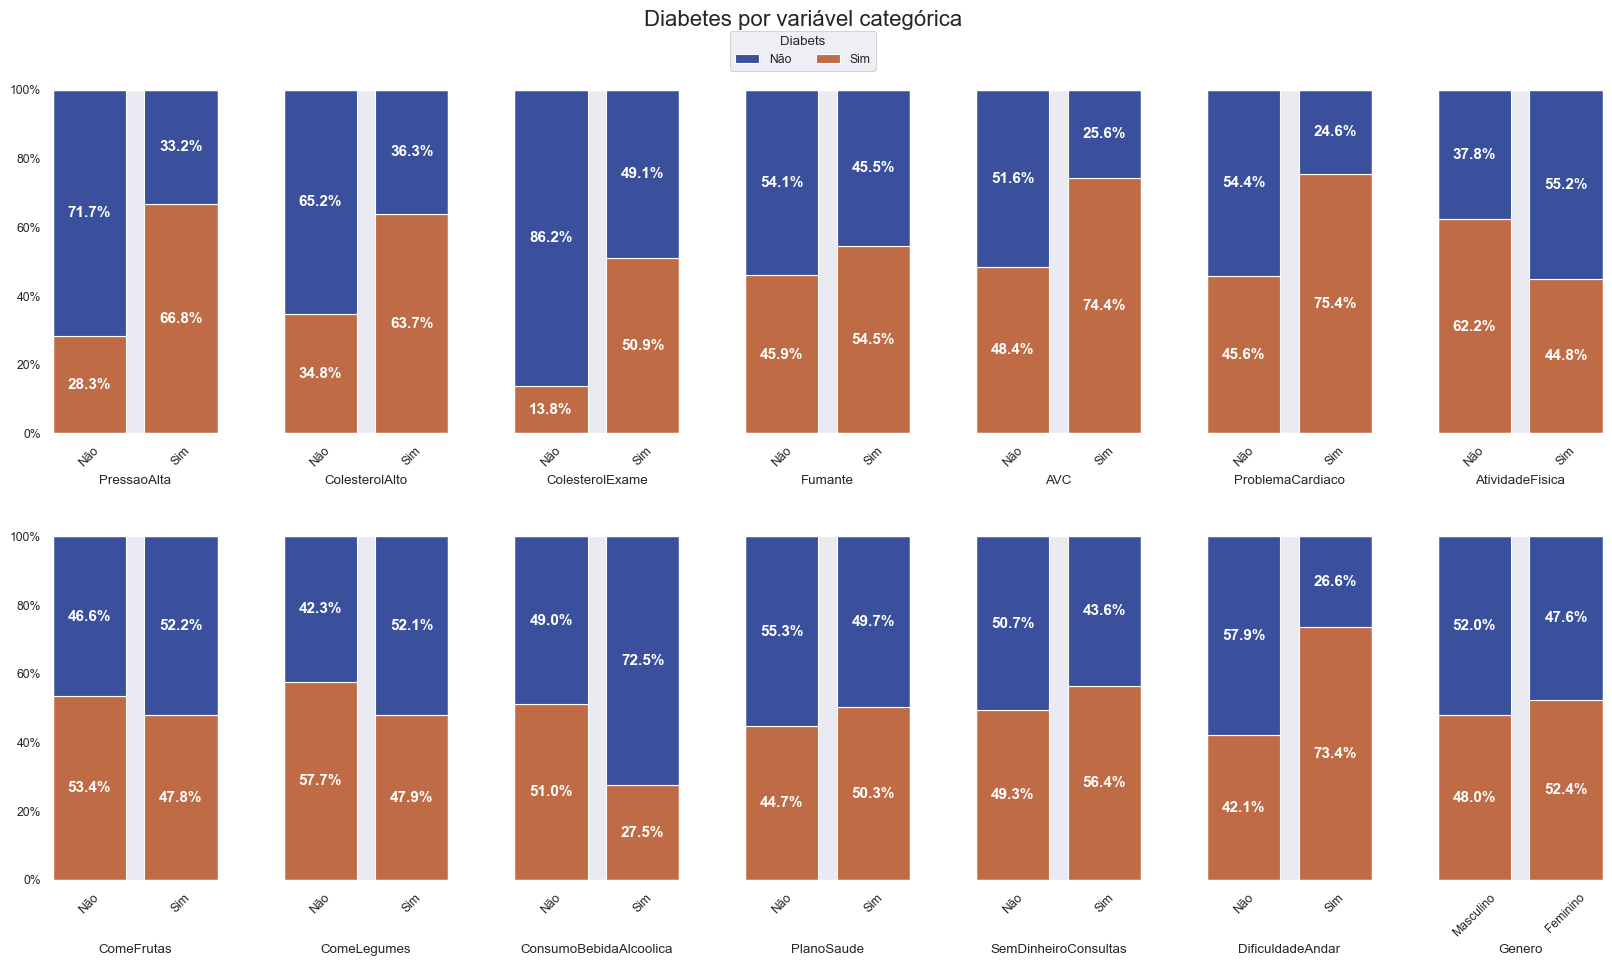

In [28]:
histogramas_variaveis_categoricas(df_diabetes_tratado, 
                                      colunas_binarias,
                                      coluna_alvo,
                                      linhas=2,
                                      colunas=7, 
                                      tamanho=(20, 10), 
                                      titulo="Diabetes por variável categórica",
                                      legenda = "Diabets"
                                     )

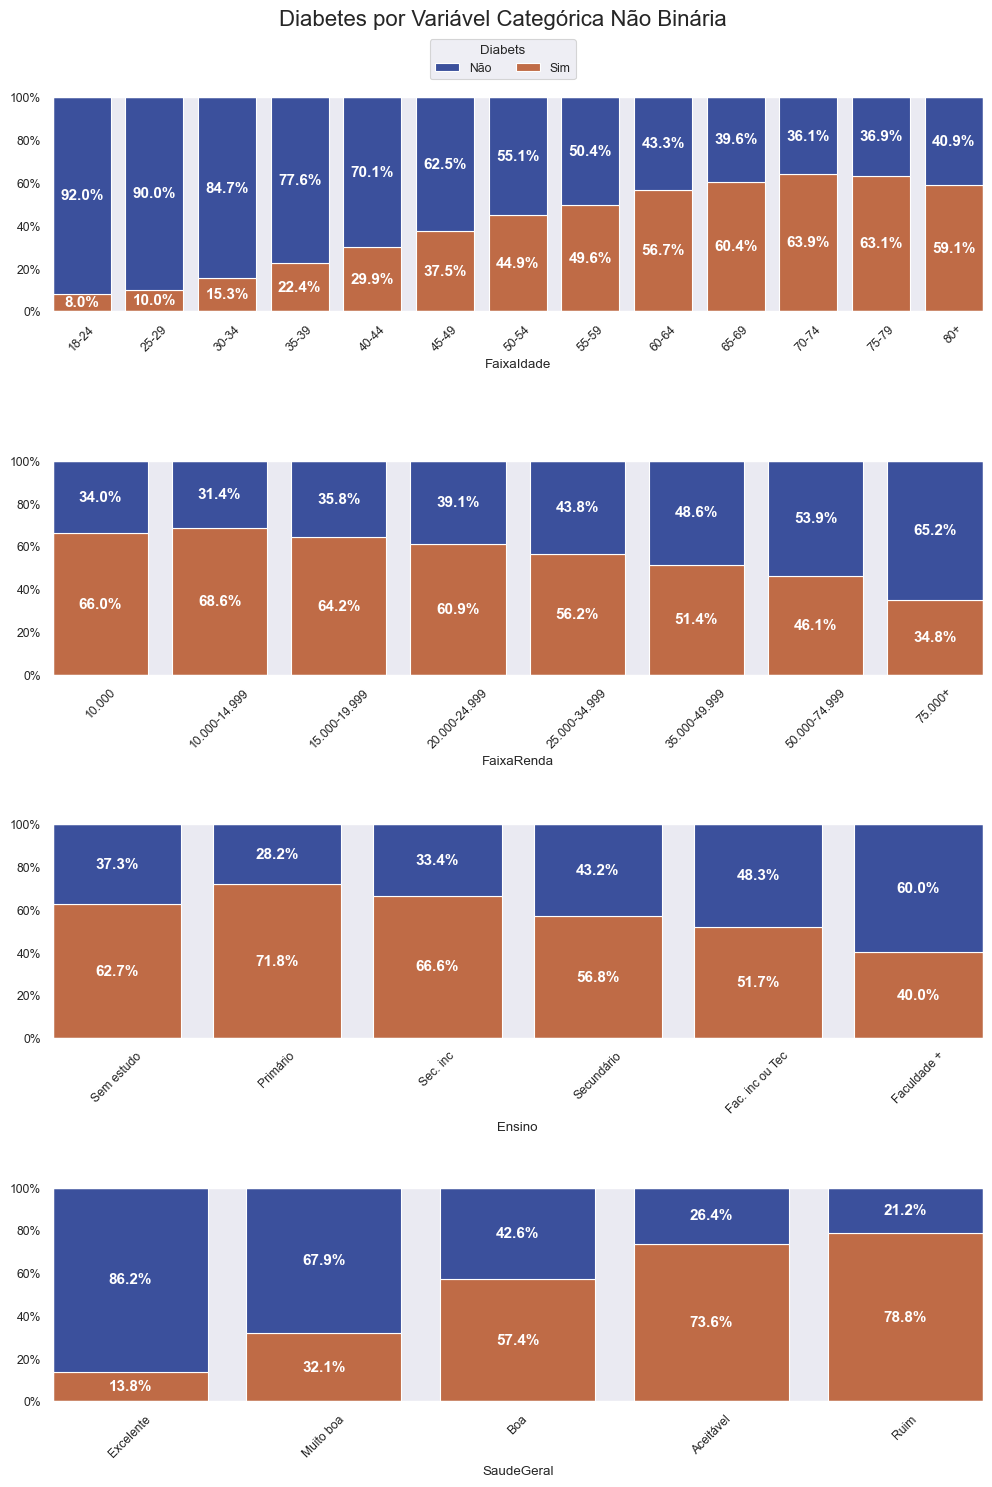

In [41]:
histogramas_variaveis_categoricas_nao_binarias(df_diabetes_tratado, 
                                      colunas_nao_binarias,
                                      coluna_alvo,
                                      titulo="Diabetes por Variável Categórica Não Binária",
                                      legenda = "Diabets"
                                     )

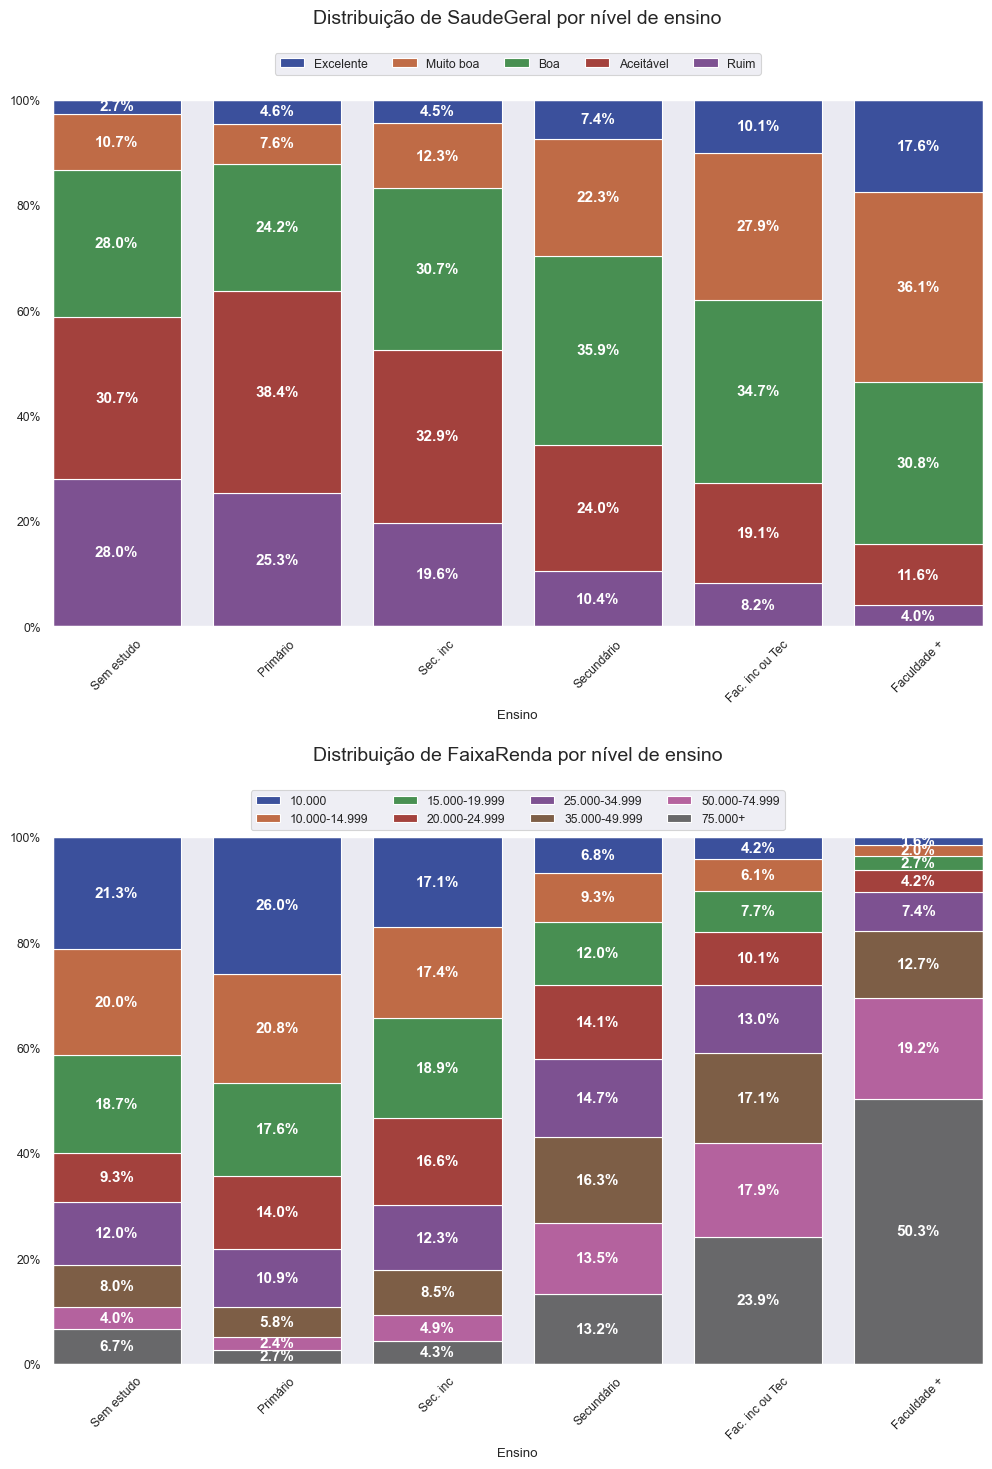

In [30]:
colunas_analise = ['SaudeGeral', 'FaixaRenda']


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

for ax, coluna in zip(axs.flatten(), colunas_analise):
    h = sns.histplot(x='Ensino', 
                     hue=coluna, 
                     data=df_diabetes_tratado, 
                     multiple='fill', 
                     ax=ax, 
                     stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

    labels = [text.get_text() for text in legend.get_texts()]
    numero_itens = len(df_diabetes_tratado[coluna].cat.categories)
    ax.legend(
        handles=legend.legend_handles,
        labels = labels,
        loc = 'upper center',
        ncols= numero_itens if numero_itens <= 6 else min(4, numero_itens),
        bbox_to_anchor=(0.5, 1.1)
    )


    ax.set_title(f'Distribuição de {coluna} por nível de ensino', fontsize = 14, pad=55) #pad espaçamento do título entre ele e o sistema d eeixo

plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.9)

plt.show()

In [31]:
tabelas_contigencia = {}

for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:
        tabelas_contigencia[coluna] = pd.crosstab(df_diabetes_tratado[coluna_alvo], df_diabetes_tratado[coluna])

In [32]:
tabelas_contigencia

{'PressaoAlta': PressaoAlta    Não    Sim
 Diabetes                 
 Não          22118  13228
 Sim           8742  26604,
 'ColesterolAlto': ColesterolAlto    Não    Sim
 Diabetes                    
 Não             21869  13477
 Sim             11660  23686,
 'ColesterolExame': ColesterolExame   Não    Sim
 Diabetes                    
 Não              1508  33838
 Sim               241  35105,
 'Fumante': Fumante     Não    Sim
 Diabetes              
 Não       20065  15281
 Sim       17029  18317,
 'AVC': AVC         Não   Sim
 Diabetes             
 Não       34219  1127
 Sim       32078  3268,
 'ProblemaCardiaco': ProblemaCardiaco    Não   Sim
 Diabetes                     
 Não               32775  2571
 Sim               27468  7878,
 'AtividadeFisica': AtividadeFisica    Não    Sim
 Diabetes                     
 Não               7934  27412
 Sim              13059  22287,
 'ComeFrutas': ComeFrutas    Não    Sim
 Diabetes                
 Não         12790  22556
 Sim    

In [33]:
tabelas_contigencia['PressaoAlta']

PressaoAlta,Não,Sim
Diabetes,,
Não,22118,13228
Sim,8742,26604


In [34]:
for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:
        display(pd.crosstab(
            df_diabetes_tratado[coluna_alvo],
            df_diabetes_tratado[coluna], 
            margins = True, 
            normalize = "index").
               style.format("{:.2%}"))

PressaoAlta,Não,Sim
Diabetes,,
Não,62.58%,37.42%
Sim,24.73%,75.27%
All,43.65%,56.35%


ColesterolAlto,Não,Sim
Diabetes,,
Não,61.87%,38.13%
Sim,32.99%,67.01%
All,47.43%,52.57%


ColesterolExame,Não,Sim
Diabetes,,
Não,4.27%,95.73%
Sim,0.68%,99.32%
All,2.47%,97.53%


Fumante,Não,Sim
Diabetes,,
Não,56.77%,43.23%
Sim,48.18%,51.82%
All,52.47%,47.53%


AVC,Não,Sim
Diabetes,,
Não,96.81%,3.19%
Sim,90.75%,9.25%
All,93.78%,6.22%


ProblemaCardiaco,Não,Sim
Diabetes,,
Não,92.73%,7.27%
Sim,77.71%,22.29%
All,85.22%,14.78%


AtividadeFisica,Não,Sim
Diabetes,,
Não,22.45%,77.55%
Sim,36.95%,63.05%
All,29.70%,70.30%


ComeFrutas,Não,Sim
Diabetes,,
Não,36.19%,63.81%
Sim,41.46%,58.54%
All,38.82%,61.18%


ComeLegumes,Não,Sim
Diabetes,,
Não,17.89%,82.11%
Sim,24.36%,75.64%
All,21.12%,78.88%


ConsumoBebidaAlcoolica,Não,Sim
Diabetes,,
Não,93.81%,6.19%
Sim,97.65%,2.35%
All,95.73%,4.27%


PlanoSaude,Não,Sim
Diabetes,,
Não,4.99%,95.01%
Sim,4.02%,95.98%
All,4.50%,95.50%


SemDinheiroConsultas,Não,Sim
Diabetes,,
Não,91.80%,8.20%
Sim,89.41%,10.59%
All,90.61%,9.39%


SaudeGeral,Excelente,Muito boa,Boa,Aceitável,Ruim
Diabetes,,,,,
Não,20.21%,38.17%,28.21%,9.94%,3.48%
Sim,3.23%,18.05%,38.07%,27.70%,12.95%
All,11.72%,28.11%,33.14%,18.82%,8.22%


DificuldadeAndar,Não,Sim
Diabetes,,
Não,86.58%,13.42%
Sim,62.88%,37.12%
All,74.73%,25.27%


Genero,Masculino,Feminino
Diabetes,,
Não,56.51%,43.49%
Sim,52.09%,47.91%
All,54.30%,45.70%


FaixaIdade,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Diabetes,,,,,,,,,,,,,
Não,2.55%,3.55%,4.91%,6.13%,6.99%,8.22%,10.71%,12.28%,12.39%,12.16%,8.21%,5.63%,6.27%
Sim,0.22%,0.40%,0.89%,1.77%,2.97%,4.93%,8.74%,12.06%,16.22%,18.55%,14.54%,9.63%,9.08%
All,1.38%,1.97%,2.90%,3.95%,4.98%,6.58%,9.72%,12.17%,14.30%,15.36%,11.38%,7.63%,7.68%


Ensino,Sem estudo,Primário,Sec. inc,Secundário,Fac. inc ou Tec,Faculdade +
Diabetes,,,,,,
Não,0.08%,1.31%,3.26%,23.78%,27.38%,44.19%
Sim,0.13%,3.35%,6.50%,31.31%,29.29%,29.42%
All,0.11%,2.33%,4.88%,27.55%,28.33%,36.81%


FaixaRenda,10.000,10.000-14.999,15.000-19.999,20.000-24.999,25.000-34.999,35.000-49.999,50.000-74.999,75.000+
Diabetes,,,,,,,,
Não,3.47%,3.99%,5.63%,7.37%,9.92%,14.13%,17.43%,38.06%
Sim,6.74%,8.73%,10.09%,11.47%,12.74%,14.97%,14.90%,20.36%
All,5.11%,6.36%,7.86%,9.42%,11.33%,14.55%,16.16%,29.21%


In [35]:
for coluna, tabela in tabelas_contigencia.items():
    chi2, valor_p, _, _ = chi2_contingency(tabela)
    print(f'{coluna} - {chi2=} - {valor_p=}')
   

PressaoAlta - chi2=10287.972984997781 - valor_p=0.0
ColesterolAlto - chi2=5911.8066998822505 - valor_p=0.0
ColesterolExame - chi2=939.6317718798653 - valor_p=2.3798712773419562e-206
Fumante - chi2=522.4810772937883 - valor_p=1.2211053080400827e-115
AVC - chi2=1111.0793074560897 - valor_p=1.290837098922016e-243
ProblemaCardiaco - chi2=3161.7202445322782 - valor_p=0.0
AtividadeFisica - chi2=1778.9607035956992 - valor_p=0.0
ComeFrutas - chi2=206.50090830615105 - valor_p=7.967064756507964e-47
ComeLegumes - chi2=444.0806516898606 - valor_p=1.4007103685991128e-98
ConsumoBebidaAlcoolica - chi2=635.0865339749427 - valor_p=3.9133962745676324e-140
PlanoSaude - chi2=37.79561046998934 - valor_p=7.855833890083924e-10
SemDinheiroConsultas - chi2=118.4167174482265 - valor_p=1.4053255735064045e-27
SaudeGeral - chi2=12304.318979903528 - valor_p=0.0
DificuldadeAndar - chi2=5253.694843161374 - valor_p=0.0
Genero - chi2=139.26185542886512 - valor_p=3.860395909809483e-32
FaixaIdade - chi2=6179.057132257292

In [36]:
#coeficiente de spearman - variáveis ordinais
resultados_correlacao= df_diabetes_tratado.select_dtypes('category').apply(lambda coluna: coluna.cat.codes).corr(method="spearman", numeric_only=False)

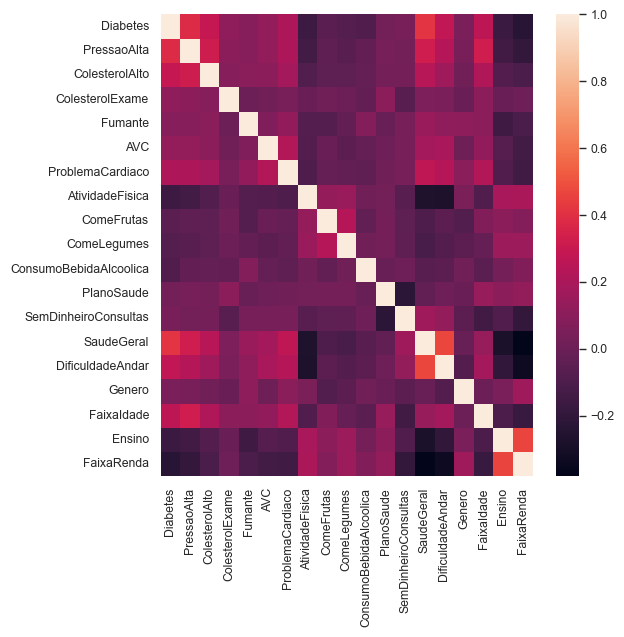

In [37]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(resultados_correlacao)
plt.show()

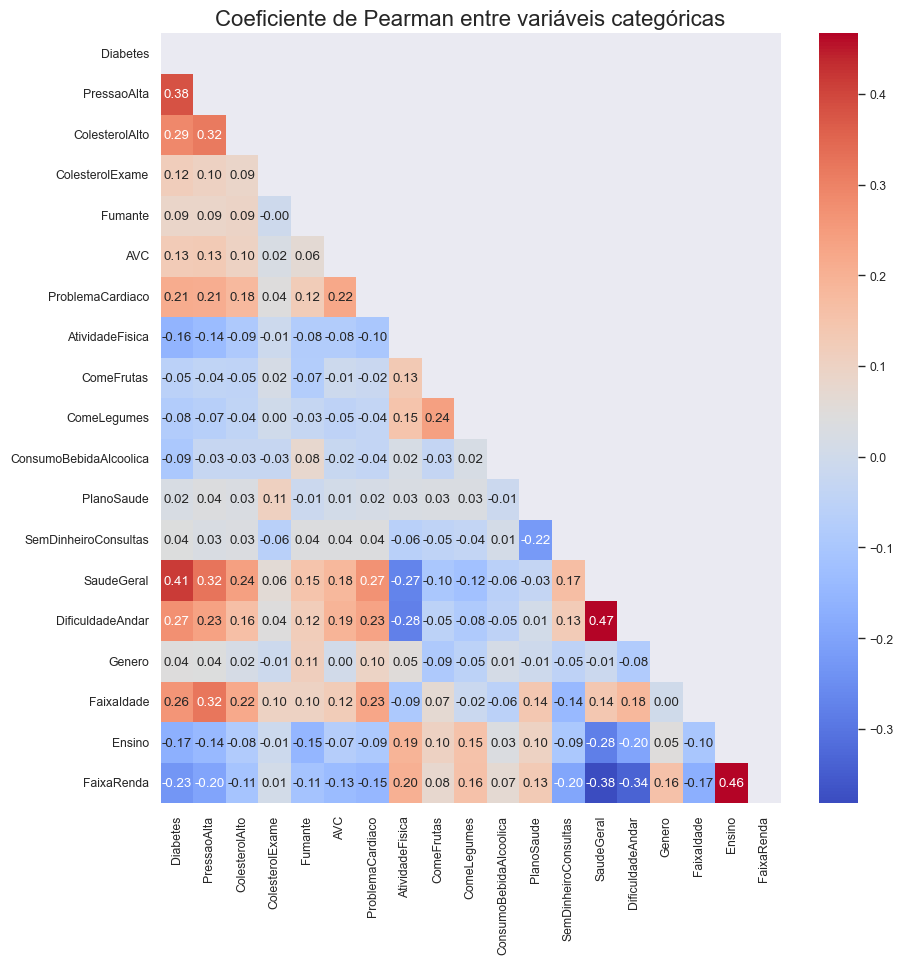

In [38]:
matriz = np.triu(resultados_correlacao)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(resultados_correlacao, mask = matriz, annot = True, fmt = '.2f', ax=ax, cmap = 'coolwarm' )
plt.title('Coeficiente de Pearman entre variáveis categóricas', fontsize=16)
plt.show()